# PDAP2019: Homework assignment 04

## Homework exercise

### Logistics

* This homework exercise consists of this notebook.
* Submit this homework by saving this notebook to the folder `/home/pdap2019/YOURUSERNAME/homework/03/submission` on your Jupyter at https://aether.uni-bremen.de/lamoslab (you will need to create that folder).
* Make sure that in that folder, there is only one `*.ipynb` file.  **If there is more than one `*.ipynb` in the submission folder, I will not correct your homework!**
* I will collect your submission **on Tuesday 18 June 2019 at 08:00** automatically.  Late submission is not possible.  Submission via other means is not possible.
* You can use the command `pdap2019_check_submission` (on the Terminal) to see if you placed the file in the correct location.

In [1]:
%matplotlib inline
import pandas as pd

### Problem: Calculating a linear trend

In this exercise, we want to caltulate the trend of NO2 concentrations in Bremen.  Data are available on the website https://luftmessnetz.bremen.de/station/DEHB001 for a station *Bremen-Mitte* (the station is located [right here](https://www.google.de/maps/@53.0772425,8.814626,60a,35y,100.43h,52.28t/data=!3m1!1e3) close to Wallanlagen).

As this exercise is about working with the data, I already prepared code for you to load and prepare the data.  Here, we will be working with monthly average values.  All data are given in µg/m³.

In [2]:
df = pd.read_csv('/data/pdap/bre_DEHB001_20110301-20190531.csv', sep=';', skiprows=5, names=['mon', 'PM10', 'NO2', 'NOx', 'NO', 'O3', 'SO2', 'CO'])
df['CO'] *= 1000.  # convert CO from mg/m3 to ug/m3
df.index = pd.date_range('2011-03', '2019-06', freq='M')  # add proper time index to DataFrame
del df['mon']  # remove string representation of month 
df.head()

PM10  NO2  NOx  NO  O3  SO2     CO
2011-03-31    25   35   46   7  39    2  300.0
2011-04-30    27   26   32   4  66    2  300.0
2011-05-31    24   21   25   3  69    2  300.0
2011-06-30    18   18   22   3  63    2  200.0
2011-07-31    19   17   20   3  57    2  200.0

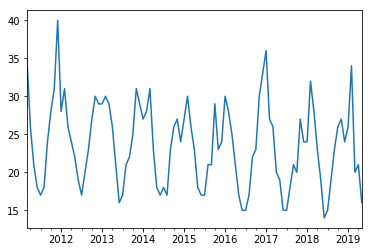

In [3]:
df.NO2.plot();

As you can see, it looks like the NO2 concentrations are decreasing - Bremen seems to be getting cleaner!

### Task: Calculate linear change rate of NO2 concentrations in downtown Bremen

Calculate the linear trend, i.e., the change rate **in units of µg/m³/yr** for this dataset.

**HINT:** You can use the `date2num` function to create a numerical representation of time before using `linregress` or `polyfit` to do the actual regression.

In [4]:
from netCDF4 import date2num

In [5]:
xdays = date2num(df.index.to_pydatetime(), 'days since 2010-12-31')
print(xdays)

[  90.  120.  151.  181.  212.  243.  273.  304.  334.  365.  396.  425.
  456.  486.  517.  547.  578.  609.  639.  670.  700.  731.  762.  790.
  821.  851.  882.  912.  943.  974. 1004. 1035. 1065. 1096. 1127. 1155.
 1186. 1216. 1247. 1277. 1308. 1339. 1369. 1400. 1430. 1461. 1492. 1520.
 1551. 1581. 1612. 1642. 1673. 1704. 1734. 1765. 1795. 1826. 1857. 1886.
 1917. 1947. 1978. 2008. 2039. 2070. 2100. 2131. 2161. 2192. 2223. 2251.
 2282. 2312. 2343. 2373. 2404. 2435. 2465. 2496. 2526. 2557. 2588. 2616.
 2647. 2677. 2708. 2738. 2769. 2800. 2830. 2861. 2891. 2922. 2953. 2981.
 3012. 3042. 3073.]


In [6]:
xyears = xdays / 365.25

In [7]:
no2 = df.NO2

In [8]:
from scipy.stats import linregress

In [9]:
linregress(xyears, no2)

LinregressResult(slope=-0.4045571398184678, intercept=25.388781683534486, rvalue=-0.1756945563513539, pvalue=0.08194768322627345, stderr=0.2301585087545041)

So the linear trend is -0.4  µg/m³/yr.